# SPI - Future data - Cork Airport

In [2]:
# set working directory to root
setwd("../../")

In [3]:
# import requirements and functions
source(
    "./jupyter-notebooks/scripts/spi-spei.R",
    echo = TRUE,
    max.deparse.length = 2000
)


> library(eurocordexr)


Loading required package: data.table

Loading required package: magrittr

Loading required package: ncdf4

Loading required package: ncdf4.helpers




> library(SPEI)


Loading required package: lmomco

Loading required package: parallel

Loading required package: ggplot2

# Package SPEI (1.7) loaded [try SPEINews()].




> library(latticeExtra)


Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer





> library(lubridate)



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union





> kelvin_to_celsius <- function(kelvin) {
+     celsius <- (kelvin - 273.15)
+     return(celsius)
+ }

> kgm2s_to_mmday <- function(kgm2s) {
+     mmday <- (kgm2s * 60 * 60 * 24)
+     return(mmday)
+ }

> ec_process <- function(datapath, indexcell, var) {
+     df <- nc_grid_to_dt(filename = datapath, variable = var)
+     df <- subset(df, icell == indexcell)
+     df$date <- as.Date(df$date, format = "%Y-%m-%d")
+     df$month <- month(df$date, label = TRUE)
+     df$year <- year(df$date)
+     if (var == "pr") {
+         df$pr <- kgm2s_to_mmday(df$pr)
+     }
+     else if (var == "tasmax") {
+         df$tasmax <- kelvin_to_celsius(df$tasmax)
+     }
+     else if (var == "tasmin") {
+         df$tasmin <- kelvin_to_celsius(df$tasmin)
+     }
+     return(df)
+ }

> hist_process <- function(datadir, variable, indexcell) {
+     ncfile <- paste(datadir, variable, "_EUR-11_NCC-NorESM1-M_historical_r1i1p1_DMI-HIRHAM5_v3_mon_", 
+         sep = "")
+     d1 <- ec_process(datapath = 

In [4]:
# Cork Airport grid cell
indexcell <- 68801

# directory where the future nc files are stored
datadir <- "./data/eurocordex/DMI/rcp85/mon/"

In [5]:
# process precipitation data
pr <- future_process(
    datadir = datadir, variable = "pr", indexcell = indexcell
)

In [6]:
head(pr)

pr,month,year
<dbl>,<ord>,<dbl>
5.325353,Jan,2041
2.974051,Feb,2041
6.127268,Mar,2041
3.691406,Apr,2041
1.923135,May,2041
2.319792,Jun,2041


In [7]:
dcast(pr, year~month, value.var = c("pr"))

year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,5.325353,2.974051,6.127268,3.691406,1.923135,2.3197917,0.2391633,2.2245463,1.6585937,3.304184,3.299219,6.471522
2042,5.424395,4.335938,5.186744,2.218750,1.731855,2.5083334,1.4881553,2.0640120,2.2924479,2.771421,3.375260,2.797379
2043,3.769153,6.925502,5.718498,1.007552,1.883317,2.6601561,1.5831654,2.3951614,0.9546875,3.777722,6.102084,2.533266
2044,7.269405,4.352679,2.115171,1.661979,1.807964,2.9367187,2.3591230,1.8964214,2.1916667,2.757308,2.802344,5.183468
2045,2.991683,2.681641,5.389869,3.972396,1.015121,1.7044271,0.5410786,0.4947077,4.1773439,4.564768,3.702083,5.781754
2046,4.148941,5.866629,3.886593,1.199479,1.171119,2.4200522,1.4422883,1.9614416,2.5411459,2.957157,3.778906,4.295615
2047,4.313508,1.532087,4.038306,2.602865,3.406754,2.5851562,3.2167338,0.2797379,2.1010417,6.419103,3.538281,4.838206
2048,3.899194,2.032645,5.200353,3.040625,2.368700,1.9338542,0.4311996,1.5655243,2.9940104,4.339718,2.981250,3.865675
2049,3.359375,3.384208,4.035786,4.191146,2.039315,2.6049479,1.1464214,1.1786794,3.0161458,3.529234,3.268490,3.734627


## SPI-12

In [8]:
spi <- spi_calc(data = pr, spi_num = 12)

In [9]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.62314499
2042,0.593462027,0.8407797068,0.64377584,0.384586304,0.340131825,0.36212291,0.62378450,0.56862814,0.72345064,0.640243720,0.64123465,-0.22355938
2043,-0.516786433,0.0440097300,0.16961052,-0.094029055,-0.086557239,-0.03250534,-0.03629095,0.05194089,-0.25658798,-0.062253762,0.57550145,0.56239674
2044,1.230768332,0.6848781571,-0.03780570,0.094421710,0.059063614,0.12625553,0.27956343,0.17492852,0.44254365,0.213037854,-0.56726344,0.06895700
2045,-0.858900494,-1.2415029726,-0.44792918,0.023306984,-0.188157753,-0.43097702,-0.90554727,-1.15566063,-0.75094035,-0.391463349,-0.15031185,-0.01190539
2046,0.282055413,0.9079876264,0.60089141,0.048457615,0.065088783,0.22524034,0.40863704,0.69490958,0.37402090,-0.005800697,0.02281440,-0.36048022
2047,-0.226111086,-1.2145306120,-1.10435194,-0.887507361,-0.403830478,-0.31722167,0.04953592,-0.29602963,-0.42453145,0.352883962,0.29388495,0.45434970
2048,0.342158437,0.4251963750,0.65173342,0.802708941,0.593579187,0.41764961,-0.21004028,0.09174826,0.28191392,-0.226069459,-0.33932115,-0.62933550
2049,-0.614158114,-0.3139344121,-0.52444750,-0.322203311,-0.445319501,-0.24263537,-0.11333099,-0.17268631,-0.18823167,-0.438368792,-0.34072647,-0.40796675


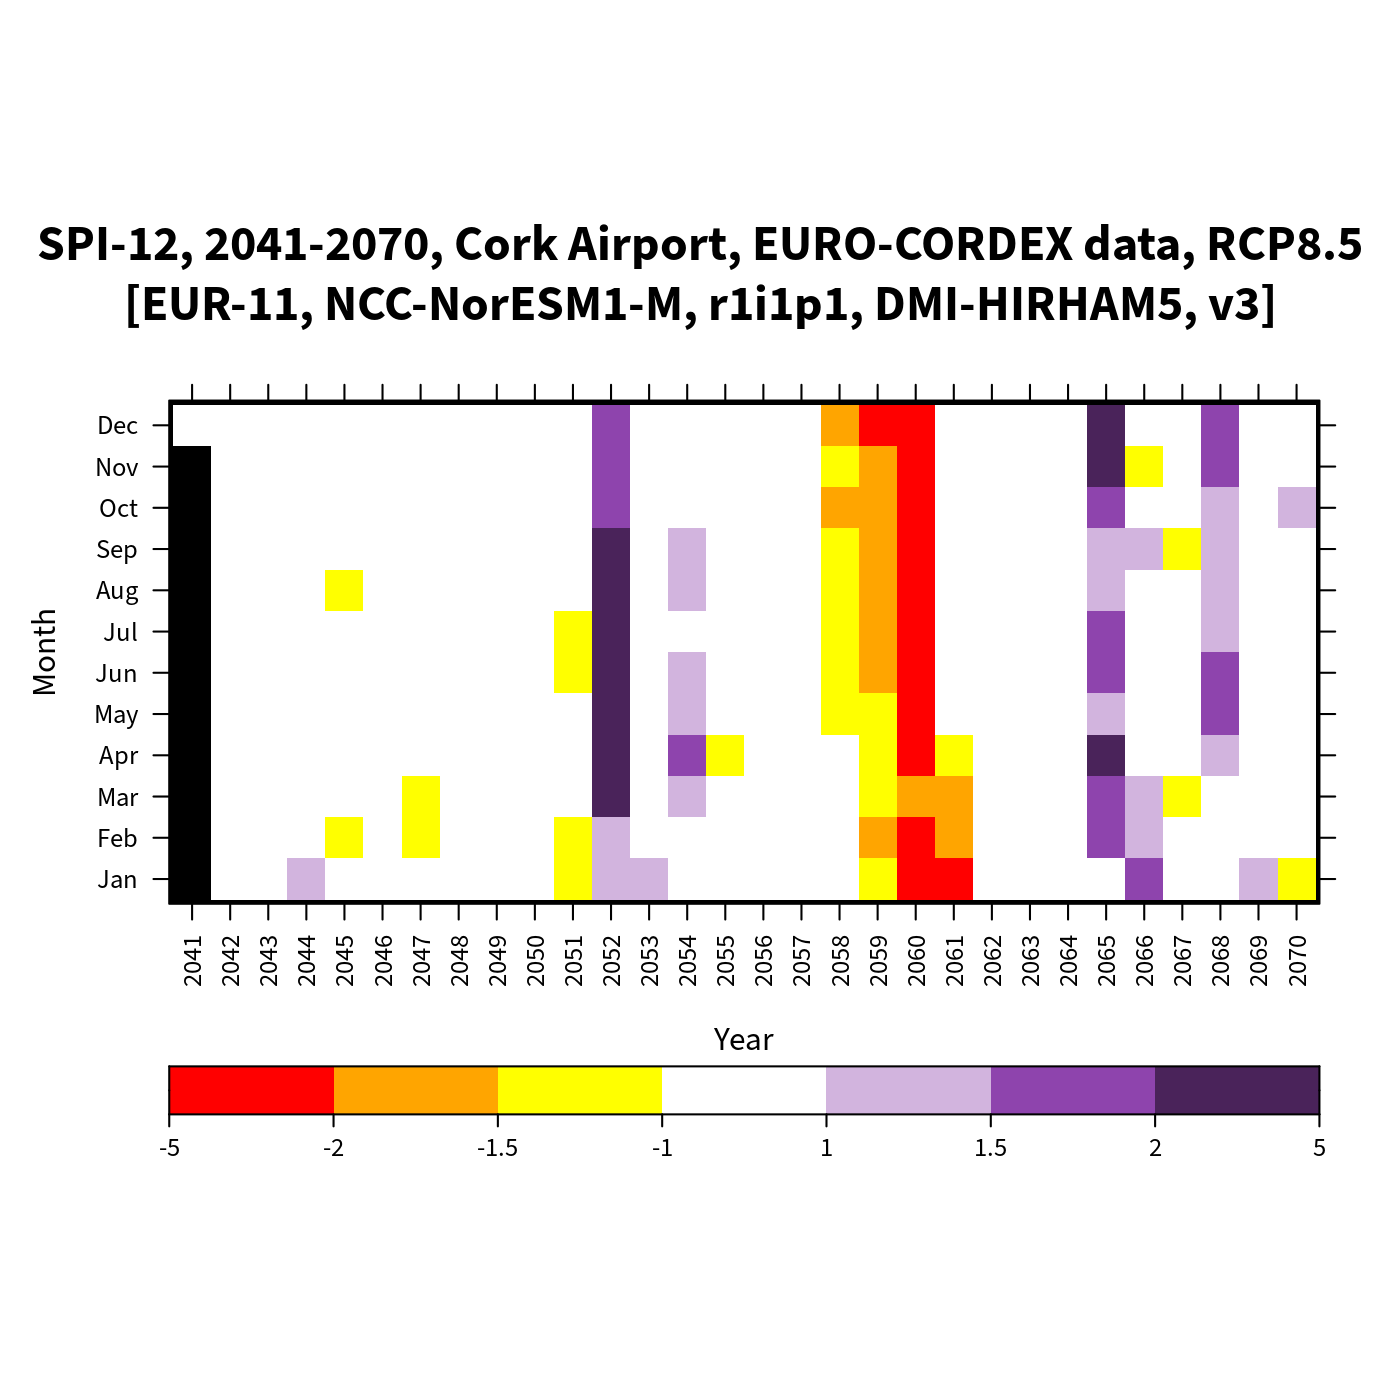

In [11]:
plot_title <- paste(
    "SPI-12, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## SPI-6

In [12]:
spi <- spi_calc(data = pr, spi_num = 6)

In [13]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,NA,NA,NA,NA,NA,1.143514319,0.40626785,0.95847795,-0.45597083,-1.01779293,-1.23137034,-0.44375920
2042,0.538104746,0.53450965,0.96152252,1.30179189,1.34778638,0.873142681,0.47387369,0.39836525,-0.32254081,-0.49728530,-0.56592641,-1.41524860
2043,-1.386817074,-0.20582359,0.35338728,0.25466057,0.34673097,1.032107769,1.23892978,0.42003763,-1.35216838,-0.33001374,0.66669402,-0.38680918
2044,0.751734551,0.67177471,0.53863235,0.39826921,-0.43950031,0.503331700,-0.33412894,-0.71323183,-0.03147877,-0.04580630,-0.37177282,-0.44640584
2045,-1.091412899,-1.25779636,-0.52700825,0.06582690,0.06475675,-0.241087617,-0.30733499,-0.54891212,-0.53878264,-0.65108930,-0.26806631,0.31854153
2046,0.698619937,1.52992891,0.94577503,0.57513125,0.33167629,0.058638456,-0.05387380,-1.05900967,-1.20301335,-0.65292571,-0.30386259,-0.52879651
2047,-0.336920907,-0.99028684,-0.76275979,-0.78421818,-0.28542967,-0.008909449,0.44346429,0.79470405,0.64331552,1.45012543,0.92372359,0.71339391
2048,0.095692079,0.05965327,0.48703334,-0.09241061,0.11260823,-0.009956443,-0.42020066,0.10881966,-0.30625938,-0.17390670,-0.67884321,-0.84312942
2049,-0.607195479,-0.51253359,-0.48542909,-0.34215034,-0.05410777,0.343719941,0.45036734,0.39769091,0.63568294,-0.22232888,-0.45860613,-0.96535593


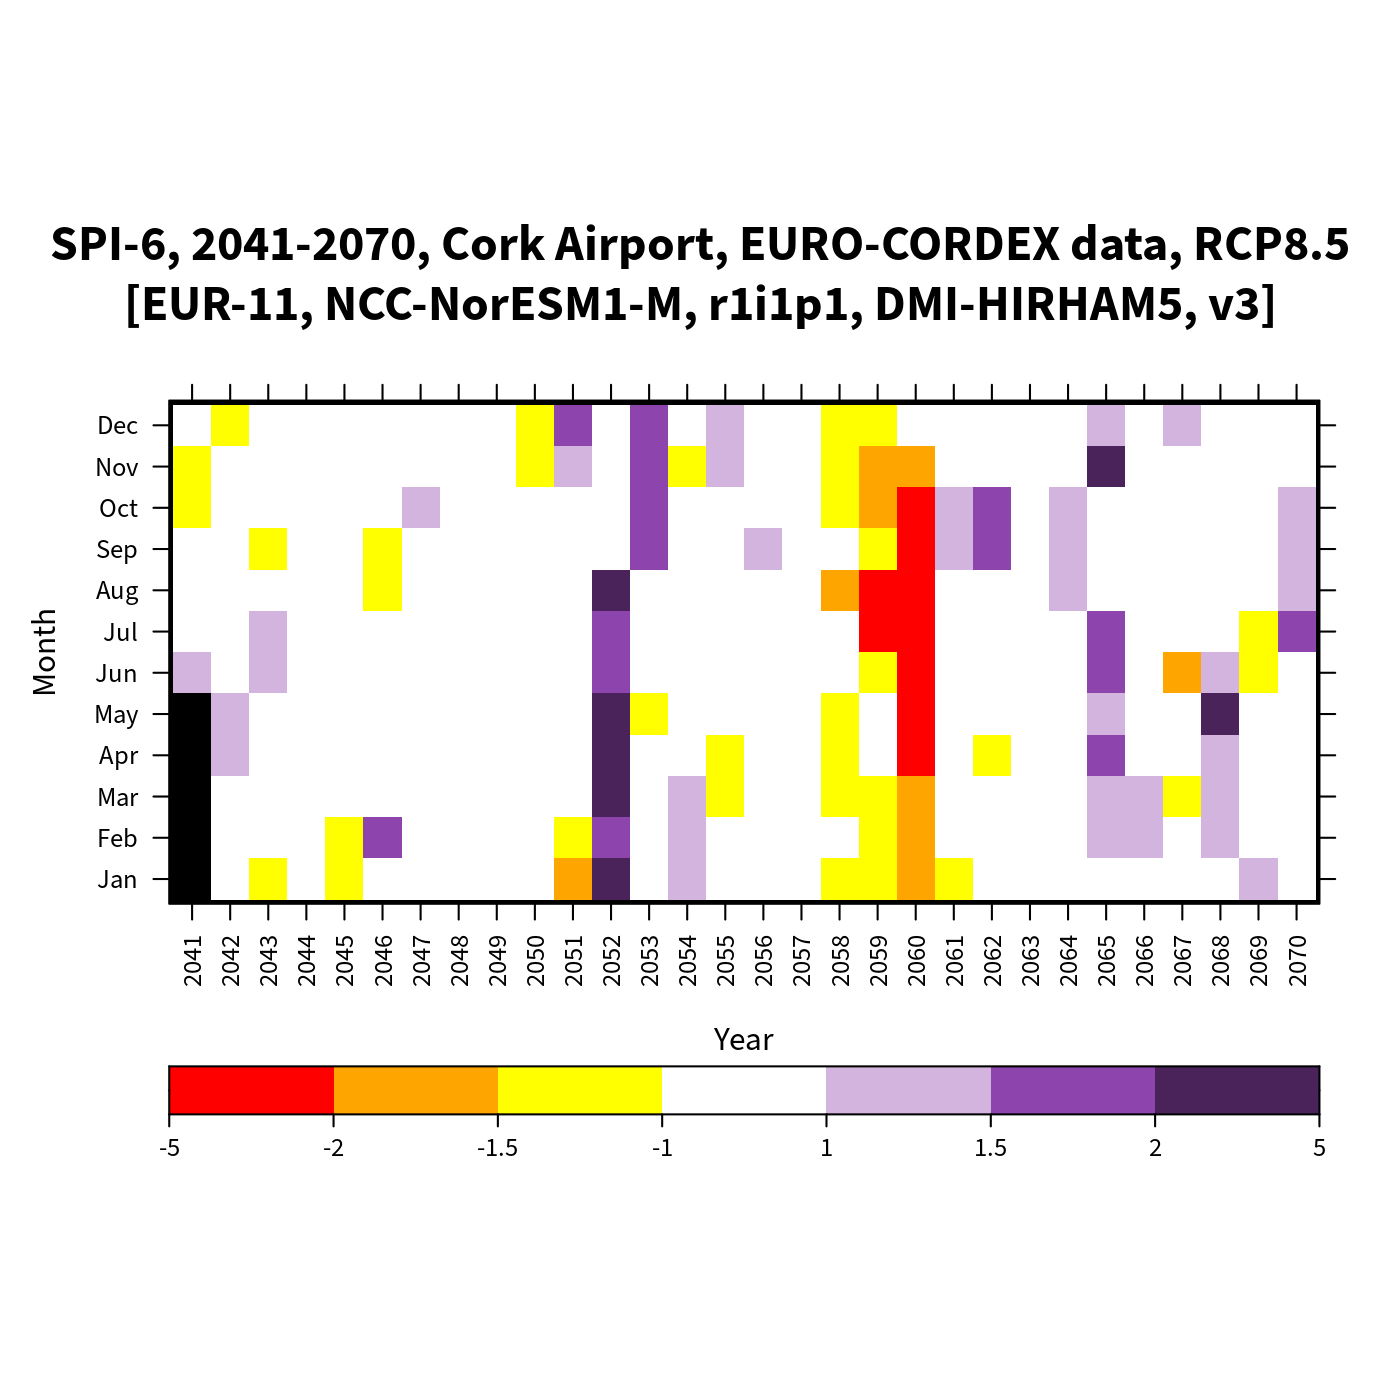

In [14]:
plot_title <- paste(
    "SPI-6, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## SPI-3

In [15]:
spi <- spi_calc(data = pr, spi_num = 3)

In [16]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,NA,NA,1.01652284,1.04362771,1.29395053,0.6072571,-0.832153908,-0.4480309,-1.35555758,-0.5413593,-0.93216138,0.258375251
2042,1.23718404,1.58756618,1.17551296,0.64405940,0.19331665,-0.3493708,-0.029098755,0.4511619,0.02158045,-0.5769351,-0.84334864,-1.563658857
2043,-1.44633008,0.52894945,1.60486310,1.35435004,-0.05447002,-1.0134632,0.202439094,0.8168203,-0.66671733,-0.5771217,0.25024146,-0.004463718
2044,1.54938383,0.79735649,0.80000376,-0.94436227,-1.71907287,-0.3858340,0.731004628,1.1480382,0.43789998,-0.7487975,-1.19568850,-0.712220298
2045,-0.85260840,-0.63380458,-0.11525373,0.76135346,0.74003205,-0.1892154,-1.785055111,-2.3152020,-0.44671372,0.5806162,0.89694846,0.629442532
2046,0.51432527,1.42793712,0.85243257,0.32850723,-1.30388315,-1.6291698,-0.460347201,0.2947452,0.09276747,-0.3808066,-0.43944467,-0.584880113
2047,-0.10195536,-0.98184394,-0.56633540,-0.92267607,0.59918879,0.9973179,1.725696020,0.4649240,-0.15742031,0.3565119,0.74724175,0.902743834
2048,-0.15957699,-0.67515457,-0.08988271,0.04451014,0.83757512,0.2394898,-0.658804415,-1.1434166,-0.62070620,0.4081148,0.02799179,-0.517419655
2049,-1.29085571,-0.75239481,-0.22074629,0.59292030,0.69285415,1.1345317,0.007835631,-0.3372274,-0.34874411,-0.2287577,-0.19357824,-0.806700022


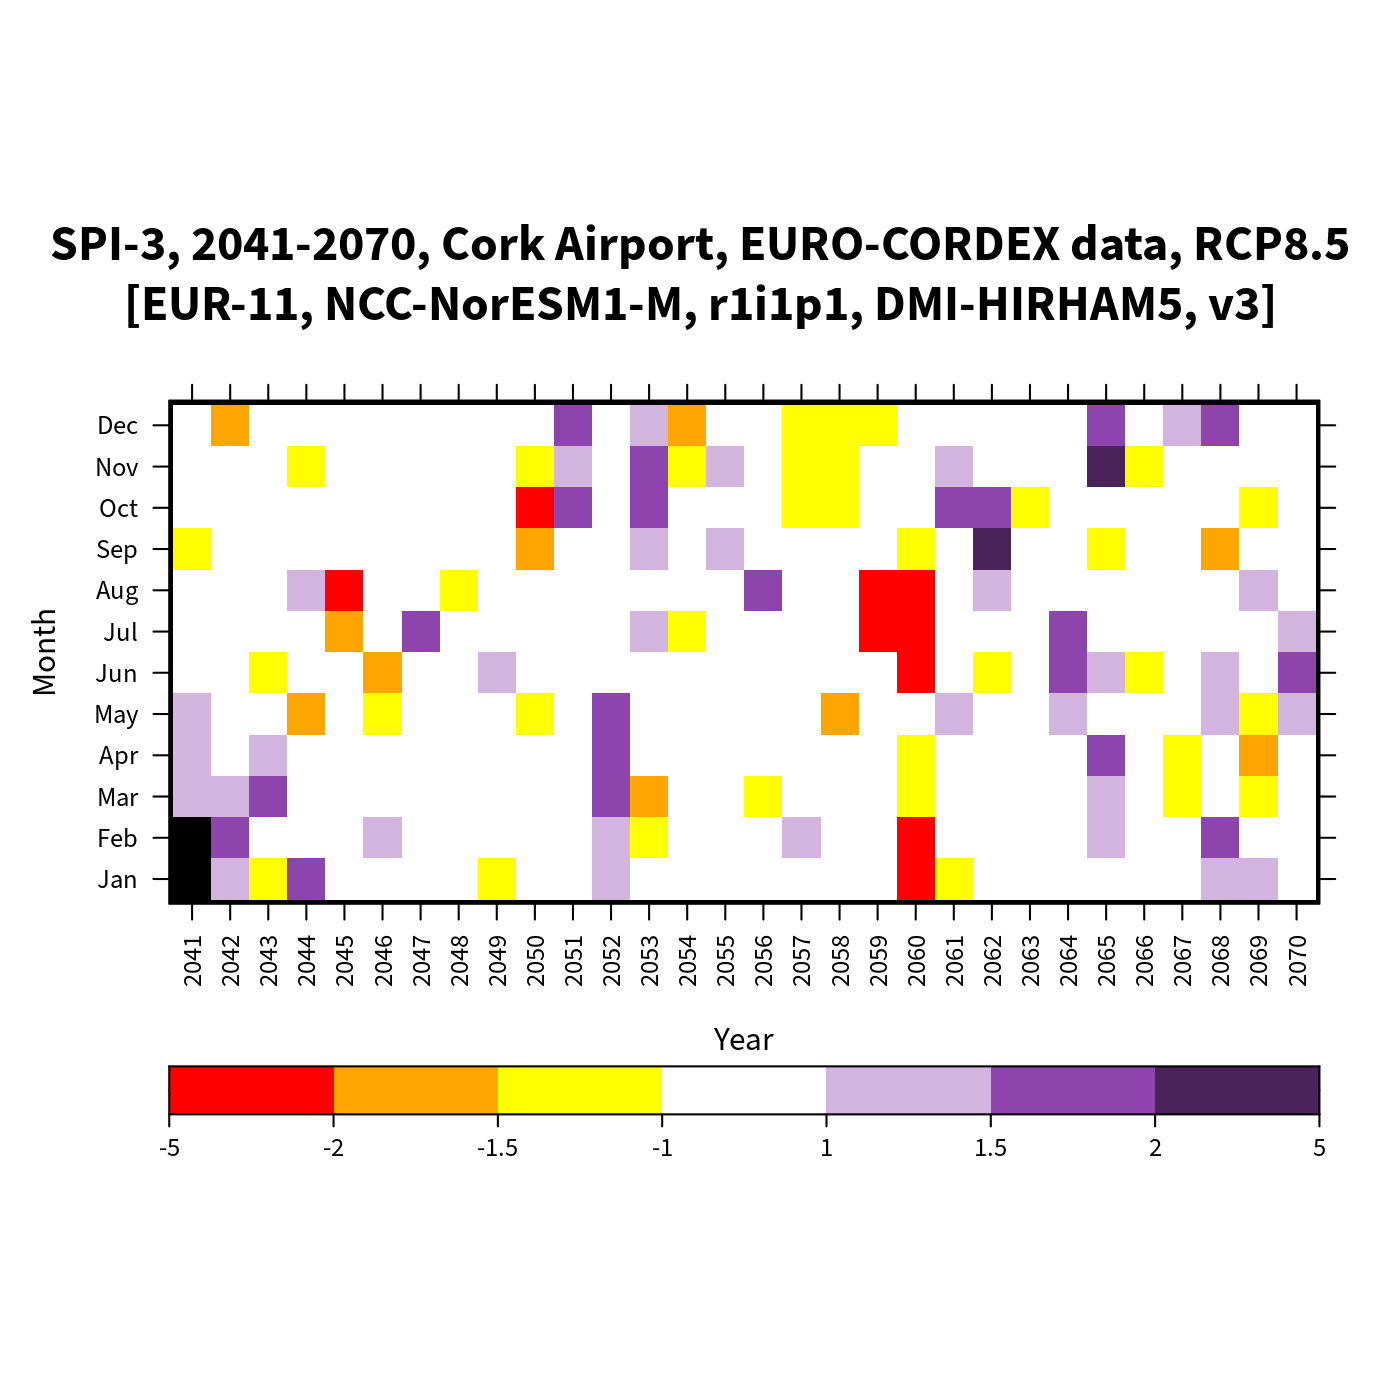

In [17]:
plot_title <- paste(
    "SPI-3, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)

## SPI-1

In [18]:
spi <- spi_calc(data = pr, spi_num = 1)

In [19]:
# view the data
spi

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2041,1.07857226,-0.40404646,1.45761239,0.91526189,-0.22495225,0.47624332,-2.07951416,0.4953909,-0.774520452,-0.332741764,-0.446800798,1.44489884
2042,1.14732936,0.50340135,0.96407198,-0.45916581,-0.44005498,0.66041705,0.06109856,0.3716598,-0.003154566,-0.742533452,-0.383919441,-1.60015061
2043,-0.13378962,1.80694614,1.24958281,-2.19840210,-0.26848968,0.80223446,0.15563229,0.6206143,-1.925944549,-0.004671085,1.429938717,-1.90917262
2044,2.30218375,0.51327994,-1.26471705,-1.14396695,-0.35262094,1.04759935,0.81452564,0.2354915,-0.115189234,-0.754095672,-0.884107016,0.55469664
2045,-0.87001918,-0.63429900,1.07527649,1.13373746,-1.43487050,-0.20479550,-1.25366007,-1.5088891,1.668722099,0.484414578,-0.124050234,0.98429110
2046,0.18889630,1.32002618,0.17427411,-1.84817039,-1.18403844,0.57535571,0.01400309,0.2892350,0.259884296,-0.594002447,-0.065225433,-0.14802704
2047,0.32261258,-1.76104438,0.27466898,-0.05287303,1.09055567,0.73285698,1.39453881,-2.0769453,-0.218931328,1.449855418,-0.252272156,0.29172139
2048,-0.02095154,-1.21551392,0.97160985,0.36374567,0.22530594,0.06582188,-1.50034667,-0.0590763,0.698032001,0.350691067,-0.720964968,-0.52372955
2049,-0.50745473,-0.10569595,0.27302211,1.29698552,-0.10130870,0.75129115,-0.31728450,-0.4631865,0.718294422,-0.173129274,-0.472490278,-0.64382943


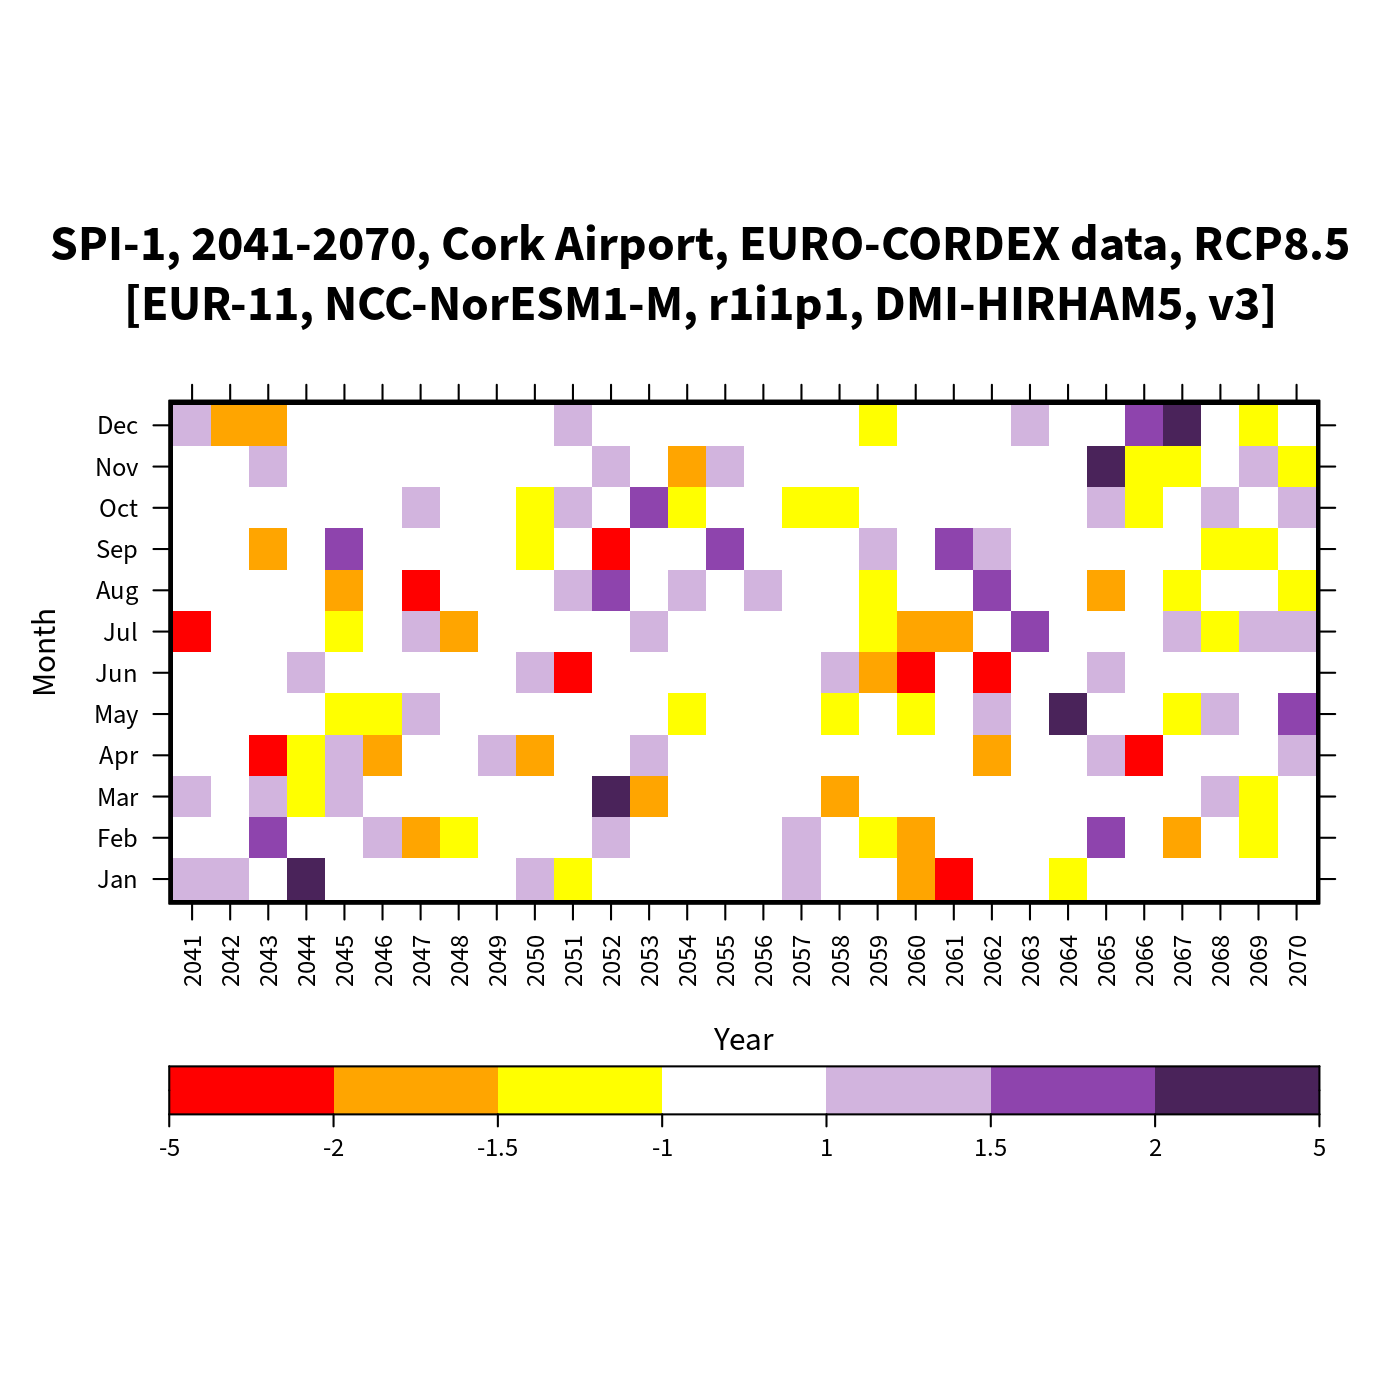

In [20]:
plot_title <- paste(
    "SPI-1, 2041-2070, Cork Airport, EURO-CORDEX data, RCP8.5",
    "[EUR-11, NCC-NorESM1-M, r1i1p1, DMI-HIRHAM5, v3]",
    sep = "\n"
)

spi_plot(data = spi, plot_title = plot_title)